<a href="https://colab.research.google.com/github/6Santiago9/Entregas/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de Librerías

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from thefuzz import process

**Info:** toca descargar el token desde kaggle y subirlo a los ficheros de colab.

# Configuración Kaggle

In [ ]:
# Establecer tus credenciales de Kaggle
os.environ['KAGGLE_USERNAME'] = 'cesarmartinezia'
os.environ['KAGGLE_KEY'] = '3bd3c2a5994356c24295cd5c6d8bba59'

In [ ]:
# Crear manualmente el archivo kaggle.json a partir de esas variables
!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (os.environ['KAGGLE_USERNAME'], os.environ['KAGGLE_KEY']))

In [ ]:
# Ajustar permisos
!chmod 600 /root/.kaggle/kaggle.json

# Descarga de Dataset

In [ ]:
# Descargar los datos de la competencia
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Cargar el Dataset

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
# Tamaño del dataset
print(df.shape)

# Primeros tres registros
df.head(5)

(692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


# Limpieza

## Datos faltantes
Al mirar la información de la base de datos se mira que algunas columnas no tienen el numero exacto de datos por lo que es mejor reemplazarlos con la moda ya que es una variable categorica

In [ ]:
# Revisar valores faltantes
df.isnull().sum().sort_values(ascending=False).head(10)
# Si es categórica reemplazar con la moda (valor más frecuente)
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3066607998.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  692500 non-null  object 
 5   E_HORASSEMANATRABAJA         692500 non-null  object 
 6   F_ESTRATOVIVIENDA            692500 non-null  object 
 7   F_TIENEINTERNET              692500 non-null  object 
 8   F_EDUCACIONPADRE             692500 non-null  object 
 9   F_TIENELAVADORA              692500 non-null  object 
 10  F_TIENEAUTOMOVIL             692500 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        692500 non-null  object 
 13 

## Columnas irrelevantes

Aqui miramos si hay columnas categoricas que contengan un solo nivel y se las pueda eliminar ya que no serian muy relevantes para el analisis

In [ ]:
columnas = ["E_PRGM_ACADEMICO", "E_PRGM_DEPARTAMENTO", "E_VALORMATRICULAUNIVERSIDAD", "E_HORASSEMANATRABAJA", "F_ESTRATOVIVIENDA",
       "F_TIENEINTERNET", "F_EDUCACIONPADRE", "F_TIENELAVADORA", "F_TIENEAUTOMOVIL", "E_PRIVADO_LIBERTAD", "E_PAGOMATRICULAPROPIO",
       "F_TIENECOMPUTADOR", "F_TIENEINTERNET.1", "F_EDUCACIONMADRE", "RENDIMIENTO_GLOBAL"]

for col in columnas:
    print(f"columna {col}: {df[col].nunique()} subniveles")

columna E_PRGM_ACADEMICO: 948 subniveles
columna E_PRGM_DEPARTAMENTO: 31 subniveles
columna E_VALORMATRICULAUNIVERSIDAD: 8 subniveles
columna E_HORASSEMANATRABAJA: 5 subniveles
columna F_ESTRATOVIVIENDA: 7 subniveles
columna F_TIENEINTERNET: 2 subniveles
columna F_EDUCACIONPADRE: 12 subniveles
columna F_TIENELAVADORA: 2 subniveles
columna F_TIENEAUTOMOVIL: 2 subniveles
columna E_PRIVADO_LIBERTAD: 2 subniveles
columna E_PAGOMATRICULAPROPIO: 2 subniveles
columna F_TIENECOMPUTADOR: 2 subniveles
columna F_TIENEINTERNET.1: 2 subniveles
columna F_EDUCACIONMADRE: 12 subniveles
columna RENDIMIENTO_GLOBAL: 4 subniveles


Todas tienen mas de 2 niveles asi que no se eliminan

## Columnas duplicadas

En los datos cargados miramos que una columna se repite por lo que se procede a eliminarla

In [ ]:
df.drop('F_TIENEINTERNET.1', axis=1, inplace=True)

## Palabras mal escritas o con mucha similitud
Aqui miramos que haya palabras mal escritas y esto se debe de corregir para que los datos esten mejor organizados, por lo que nos centramos en "Programas Academicos" que tiene 948 subniveles

In [ ]:
# Función para eliminar tildes y normalizar texto
def normalizar_texto(texto):
    if isinstance(texto, str):
        # Quitar tildes (por ejemplo: Á → A)
        texto = ''.join(
            c for c in unicodedata.normalize('NFD', texto)
            if unicodedata.category(c) != 'Mn'
        )
        # Convertir a mayúsculas
        texto = texto.strip().upper()
        return texto
    else:
        return texto

# Aplicar la función directamente sobre la columna original
df['E_PRGM_ACADEMICO'] = df['E_PRGM_ACADEMICO'].apply(normalizar_texto)
# Reemplazamos el nombre de algunas variables
df["E_PRGM_ACADEMICO"] = df["E_PRGM_ACADEMICO"].str.replace('DISENO','DISEÑO', regex=False)
df["E_PRGM_ACADEMICO"] = df["E_PRGM_ACADEMICO"].str.replace('LICENCIATURA M¿SICA','LICENCIATURA', regex=False)

Eliminar espacios

In [ ]:
import re
df['E_PRGM_ACADEMICO'] = df['E_PRGM_ACADEMICO'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()) if isinstance(x, str) else x)

In [ ]:
columnas = ["E_PRGM_ACADEMICO"]
for col in columnas:
    print(f"columna {col}: {df[col].nunique()} subniveles")

columna E_PRGM_ACADEMICO: 762 subniveles


Miramos que con esto hemos bajado cerca de 200 niveles, pero aun falta reescribir algunas vraiables ya significan lo mismo pero estan escritas de diferente manera

Ahora unimos todos los programas que tienen la misma similitud

Aqui utilizamos "fuzzy grouping" ya que nos permite agrupar valores parecidos o similares, aunque no sean idénticos.

In [ ]:
pip install thefuzz[speedup]


In [ ]:
from thefuzz import process

# -- Selecciona la columna que quieres agrupar ---
columna = 'E_PRGM_ACADEMICO'

# -- Define las categorías limpias (referencias) ---
categorias_referencia = [
    'ADMINISTRACION DE EMPRESAS',
    'ADMINISTRACION',
    'COMERCIO',
    'ARTES',
    'BIOLOGIA',
    'CIENCIAS',
    "CINE",
    "COMUNICACION",
    'CONTADURIA',
    "DERECHO",
    "DISENO",
    "INGENIERIA DE SISTEMAS",
    "INGENIERIA CIVIL",
    "INGENIERIA DE MINAS",
    "INGENIERIA ELECTRICA",
    "INGENIERIA INDUSTRIAL",
    "INGENIERIA MECANICA",
    "INGENIERIA QUIMICA",
    "MERCADEO",
    "LICENCIATURA",
    "NEGOCIOS INTERNACIONALES",
    "QUIMICA",
    "GASTRONOMIA"
]
#  Aplica el agrupamiento difuso
def corregir_categoria(valor):
    if pd.isnull(valor):
        return valor
    mejor_match = process.extractOne(valor, categorias_referencia)
    if mejor_match[1] >= 80:  # porcentaje mínimo de similitud
        return mejor_match[0]
    else:
        return valor
df[columna] = df[columna].apply(corregir_categoria)


In [ ]:
pd.set_option('display.max_rows', None)
print(df["E_PRGM_ACADEMICO"].value_counts().sort_index())

E_PRGM_ACADEMICO
ACTIVIDAD FISICA Y DEPORTE               2871
ADMINISTRACION DE EMPRESAS             132316
ANTROPOLOGIA                             1060
ARQUITECTURA                            11469
ARTES                                    3621
BACTERIOLOGIA Y LABORATORIO CLINICO      1000
BIOLOGIA                                 7696
CIENCIAS                                10329
CINE                                     1091
COMERCIO                                 3983
COMUNICACION                            20948
CONTADURIA                              53066
DERECHO                                 54255
DISENO                                   8730
ECONOMIA                                 7655
ENFERMERIA                              12186
FISIOTERAPIA                             5992
GASTRONOMIA                              1474
GEOGRAFIA                                1288
INGENIERIA AMBIENTAL                    13130
INGENIERIA CIVIL                        27092
INGENIERIA DE MIN

Ya despues de esto miramos que algunas carreras tienen que ver con lo mismo pero tenian diferente nombre por lo que se procede a agruparlas en una sola

In [ ]:
# Diccionario con las agrupaciones
agrupamientos = {
    'ADMINISTRACION DE EMPRESAS': ['ADMINISTRACION'],
    "LICENCIATURA": ['LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: LENGUA CASTELLANA E IDIOMA EXTRANJERO: INGLES'],
    "DERECHO": ["JURISPRUDENCIA"],
    "PSICOLOGIA": ["PSICOLOGA", "PROFESIONAL EN PSICOLOGIA"],
    "INGENIERIA DE SISTEMAS": ["INGENIERIA DE SOFTWARE", "INGENIERIA EN SOFTWARE", "INGENIER¿A EN SOFTWARE", "INGENIIERIA DE SOFTWARE"],
    "TRABAJO SOCIAL": ["PROFESIONAL EN TRABAJO SOCIAL"],
    "DISENO": ["DISE¿O CROSSMEDIA", "PROFESIONAL EN DISEÑO GRAFICO", "PROFESIONAL EN DISEÑO INDUSTRIAL", "PROFESIONAL EN DISEÑO VISUAL", "PROFESIONAL UNIVERSITARIO DISEÑO GRAFICO DIGITAL", "PROFESIONAL UNIVERSITARIO EN DISEÑO TEXTIL PARA LA INDUSTRIA", "PROFESIONAL UNIVERSITARIO EN FOTOGRAFIA PARA MEDIOS"],
    "ECONOMIA": ["ECONOMIA Y FINANZAS INTERNACIONALES", "ECONOM¿A"],
    "MEDICINA VETERINARIA": ["MEDICINA VETERINARIA Y ZOOTECNIA", "ZOOTECNIA"],
    "MERCADEO": ["MARKETING", "MARKETING Y LOGISTICA", "PROFESIONAL EN MARKETING INTERNACIONAL"],
    "ARTES": ["ARTES PLASTICAS CON ENFASIS EN PROCESOS BIDIMENSIONALES Y TRIDIMENSIONALES"],
    "SEGURIDAD Y SALUD EN EL TRABAJO": ["PROFESIONAL EN SEGURIDAD Y SALUD EN EL TRABAJO", "SALUD OCUPACIONAL"],
    "QUIMICA": ["QU¿MICA FARMAC¿UTICA"],
    "LENGUAS MODERNAS": ["LENGUAS MODERNAS Y CULTURA", "LENGUAS Y CULTURA", "LETRAS - FILOLOGIA HISPANICA", "PROFESIONAL EN LENGUAS MODERNAS", "PROGRAMA PROFESIONAL UNIVERSITARIO EN LENGUAS EXTRANJERAS", "TRADUCCION INGLES-FRANCES-ESPANOL"],
    "INSTRUMENTACION QUIRURGICA": ["INSTRUMENTACION QUIRURGICA PROFESIONAL", "INTRUMENTACION QUIRURGICA"],
    "PUBLICIDAD": ["PUBLICIDAD Y MARKETING CREATIVO", "PUBLICIDAD Y MARKETING DIGITAL", "PUBLICIDAD INTERNACIONAL"],
    "MUSICA": ["MUSICA INSTRUMENTAL", "MUSICA INSTRUMENTO", "MUSICA- CANTO", "DIRECCION DE BANDA", "INTERPRETACION MUSICAL", "MAESTRO EN MUSICA", "TEATRO MUSICAL", "FORMACION MUSICAL"],
    "AGRONOMIA": ["AGRONOMIA DEL TROPICO HUMEDO"],
    "FILOSOFIA": ["FILOSOFIA Y HUMANIDADES", "FILOSOFIA Y LETRAS", "LETRAS - FILOLOGIA HISPANICA"],
    "ACTIVIDAD FISICA Y DEPORTE": ["CULTURA FISICA Y DEPORTE", "CULTURA FISICA, DEPORTE Y RECREACION", "DEPORTE", "DEPORTE Y ACTIVIDAD FISICA", "DEPORTE Y ACTIVIDADA FISICA", "DEPORTE Y CULTURA FISICA", "ENTRENAMIENTO DEPORTIVO", "PROFESIONAL EN ACTIVIDAD FISICA Y DEPORTE",
                                   "PROFESIONAL EN DEPORTE", "PROFESIONAL EN ENTRENAMIENTO DEPORTIVO", "FORMACION PROFESIONAL EN DEPORTE", "GESTI¿N DEPORTIVA", "RECREACION"],
    "GEOGRAFIA": ["GEOGRAFIA APLICADA A LA ORGANIZACION DEL ESPACIO Y PLANIFICACION REGIONAL", "GEOGRAFIA DEL DESARROLLO REGIONAL Y AMBIENTAL", "GEOLOGIA", "GEOLOG¿A", "URBANISMO"],
    "CONSTRUCCION": ["CONSTRUCCION Y GESTION EN ARQUITECTURA", "CONSTRUCCIONES CIVILES"],
    "HISTORIA": ["HISTORIA Y ARCHIVISTICA", "HISTORIA Y PATRIMONIO"],
    "LITERATURA": ["LINGUISTICA Y LITERATURA", "ESTUDIOS LITERARIOS", "ESTUDIOS LITERARIOS Y EDICION", "CREACION LITERARIA"],
    "CRIMINALISTICA": ["INVESTIGACION CRIMINAL", "PROFESIONAL EN INVESTIGACION CRIMINAL", "PROFESIONAL EN CRIMINALISTICA"],
    "INGENIERIA DE CONTROL": ["INGENIERIA EN CONTROL"],
    "INGENIERIA EN ENERGIA": ["INGENIERIA EN ENERGIAS"],
    "MATEMATICAS": ["MATEMATICA APLICADA", "MATEMATICAS APLICADAS", "MATEMATICAS CON ENFASIS EN ESTADISTICA"] ,
    "GESTION CULTURAL": ["GESTION CULTURAL Y COMUNICATIVA", "GESTION EMPRESARIAL", "GESTION EN ECOLOGIA Y TURISMO", "GESTION Y DESARROLLO URBANOS", "GOBIERNO Y ASUNTOS PUBLICOS"],
    "HOTELERIA Y TURISMO": ["HOTELERIA Y TURISMO ECOLOGICO"],

}

# Función para reemplazar dentro del mismo df
def normalizar_programa(prog):
    for clave, valores in agrupamientos.items():
        if prog in valores:
            return clave
    return prog  # si no está en el diccionario, se deja igual

#  Aplicar directamente al df original
df['E_PRGM_ACADEMICO'] = df['E_PRGM_ACADEMICO'].apply(normalizar_programa)


In [ ]:
columnas = ["E_PRGM_ACADEMICO"]
for col in columnas:
    print(f"columna {col}: {df[col].nunique()} subniveles")

columna E_PRGM_ACADEMICO: 45 subniveles


Evalumos que programas son los mas escogidos para que esto mejore el estudio, y juntamos en un solo subnivel las carreras que no son tan escogidas, he escogido un unbral de 10000 estudiantes ya que la carrera mas escogida tiene 100.000 estudiantes haci que es un buen dato para mirar el tope minimo de estudiantes por programa

In [ ]:
# Paso 1: Contar la frecuencia de cada carrera
frecuencias = df['E_PRGM_ACADEMICO'].value_counts()

# Paso 2: Definir el umbral
umbral = 10000

# Paso 3: Identificar carreras poco escogidas
carreras_poco_frecuentes = frecuencias[frecuencias < umbral].index

# Paso 4: Reemplazar las carreras poco escogidas por "OTRAS"
df['E_PRGM_ACADEMICO'] = df['E_PRGM_ACADEMICO'].replace(carreras_poco_frecuentes, 'OTRAS')

# Paso 5 (opcional): Ver cuántas quedaron como "OTRAS"
df['E_PRGM_ACADEMICO'].value_counts().head(100)


,count
E_PRGM_ACADEMICO,
ADMINISTRACION DE EMPRESAS,132316
OTRAS,113397
LICENCIATURA,59703
DERECHO,54255
CONTADURIA,53066
PSICOLOGIA,50098
INGENIERIA INDUSTRIAL,36374
INGENIERIA CIVIL,27092
INGENIERIA DE SISTEMAS,25479


# Preprosesado

Agrupamos las variables  nosabe, no aplica y las unimos a ninguna en las columnas de "educacion padre y madre", esto con el fin de hacer que los datos se miren mejor y no tengamos muchos subniveles que no aportan nada

In [ ]:
df.F_EDUCACIONMADRE = ['Ninguno' if i in ['No sabe', 'No Aplica'] else i for i in df.F_EDUCACIONMADRE.values]
df.F_EDUCACIONPADRE = ['Ninguno' if i in ['No sabe', 'No Aplica'] else i for i in df.F_EDUCACIONPADRE.values]

## Convertir variables categoricas en numericas

Aqui vemos que muchas columnas solo tiene dos niveles por lo que se procede a convertirlas en variables numericas.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['F_TIENELAVADORA'] = le.fit_transform(df['F_TIENELAVADORA']) # Aqui el 1 es si y 0 es no
df['F_TIENEINTERNET'] = le.fit_transform(df['F_TIENEINTERNET']) # Aqui el 1 es si y 0 es no
df['F_TIENEAUTOMOVIL'] = le.fit_transform(df['F_TIENEAUTOMOVIL']) # Aqui el 1 es si y 0 es no
df['E_PRIVADO_LIBERTAD'] = le.fit_transform(df['E_PRIVADO_LIBERTAD']) # Aqui el 1 es si y 0 es no
df['E_PAGOMATRICULAPROPIO'] = le.fit_transform(df['E_PAGOMATRICULAPROPIO']) # Aqui el 1 es si y 0 es no
df['F_TIENECOMPUTADOR'] = le.fit_transform(df['F_TIENECOMPUTADOR']) # Aqui el 1 es s y 0 es n
df['E_PRIVADO_LIBERTAD'] = le.fit_transform(df['E_PRIVADO_LIBERTAD']) # Aqui el 1 es si y 0 es no
df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1,Técnica o tecnológica incompleta,1,1,0,0,1,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0,Técnica o tecnológica completa,1,0,0,0,1,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,OTRAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,Secundaria (Bachillerato) completa,1,0,0,0,0,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1,Ninguno,1,0,0,0,1,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1,Primaria completa,1,1,0,0,1,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Aqui reemplazamos variables categoricas que contienen mas de un nivel

In [ ]:
# En estrato solo se puso el numero al que pertenecian.
estrato = {'Sin Estrato' : 0,
    'Estrato 1' : 1,
    'Estrato 2' : 2,
    'Estrato 3' : 3,
    'Estrato 4' : 4,
    'Estrato 5' : 5,
    'Estrato 6' : 6}
# En trabaja se puso un valor que estara en el rango de la descripción dada
trabaja = {"Más de 30 horas" : 31,
           "0" : 0,
           "Entre 11 y 20 horas" : 15,
           "Entre 21 y 30 horas" : 25,
           "Menos de 10 horas" : 5}
# En matricula tambien se puso un valor que estara entre el valor menconado.
matricula = {"Entre 1 millón y menos de 2.5 millones" : 2,
             "Entre 2.5 millones y menos de 4 millones" : 3,
             "Menos de 500 mil" : 1,
             "Entre 500 mil y menos de 1 millón" : 7,
             "Entre 4 millones y menos de 5.5 millones" : 5,
             "Más de 7 millones" : 8,
             "Entre 5.5 millones y menos de 7 millones" : 6,
             "No pagó matrícula" : 0}
# En rendimiento se puso el numero mas alto al mejor rendimiento y disminuya conforme empeoraba
rendimiento = {"alto" : 4,
               "bajo" : 1,
               "medio-bajo" : 2,
               "medio-alto" : 3}
df['RENDIMIENTO_GLOBAL'].replace(rendimiento, inplace=True)
df['E_VALORMATRICULAUNIVERSIDAD'].replace(matricula, inplace=True)
df['E_HORASSEMANATRABAJA'].replace(trabaja, inplace=True)
df['F_ESTRATOVIVIENDA'].replace(estrato, inplace=True)

/tmp/ipython-input-933244296.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RENDIMIENTO_GLOBAL'].replace(rendimiento, inplace=True)
/tmp/ipython-input-933244296.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RENDIMIENTO_GLOBAL'].replace(rendimiento, inplace=True)
/tmp/ipython-inp

## Utilizar One-HOt

In [ ]:
df = df.copy()
df = pd.get_dummies(df, columns=['E_PRGM_DEPARTAMENTO'], dtype=int)
df = pd.get_dummies(df, columns=['F_EDUCACIONMADRE'], dtype=int)
df = pd.get_dummies(df, columns=['F_EDUCACIONPADRE'], dtype=int)
df = pd.get_dummies(df, columns=['E_PRGM_ACADEMICO'], dtype=int)

In [ ]:
df.head()

,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,E_PRGM_ACADEMICO_INGENIERIA DE SISTEMAS,E_PRGM_ACADEMICO_INGENIERIA ELECTRICA,E_PRGM_ACADEMICO_INGENIERIA INDUSTRIAL,E_PRGM_ACADEMICO_INGENIERIA MECANICA,E_PRGM_ACADEMICO_LICENCIATURA,E_PRGM_ACADEMICO_MEDICINA,E_PRGM_ACADEMICO_NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_OTRAS,E_PRGM_ACADEMICO_PSICOLOGIA,E_PRGM_ACADEMICO_TRABAJO SOCIAL
0,904256,20212,6,5,3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,645256,20212,3,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,308367,20203,3,31,3,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,470353,20195,5,0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,989032,20212,3,25,3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Miramos que todas las variables ya estan en categoria numerica lo cual nos ayuda a que a la hora de hacer el estudio los resultados sean mas limpios y precisos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 86 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   ID                                                     692500 non-null  int64  
 1   PERIODO_ACADEMICO                                      692500 non-null  int64  
 2   E_VALORMATRICULAUNIVERSIDAD                            692500 non-null  int64  
 3   E_HORASSEMANATRABAJA                                   692500 non-null  int64  
 4   F_ESTRATOVIVIENDA                                      692500 non-null  int64  
 5   F_TIENEINTERNET                                        692500 non-null  int64  
 6   F_TIENELAVADORA                                        692500 non-null  int64  
 7   F_TIENEAUTOMOVIL                                       692500 non-null  int64  
 8   E_PRIVADO_LIBERTAD                

## Normalizacion de variables numericas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()


,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,E_PRGM_ACADEMICO_INGENIERIA DE SISTEMAS,E_PRGM_ACADEMICO_INGENIERIA ELECTRICA,E_PRGM_ACADEMICO_INGENIERIA INDUSTRIAL,E_PRGM_ACADEMICO_INGENIERIA MECANICA,E_PRGM_ACADEMICO_LICENCIATURA,E_PRGM_ACADEMICO_MEDICINA,E_PRGM_ACADEMICO_NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_OTRAS,E_PRGM_ACADEMICO_PSICOLOGIA,E_PRGM_ACADEMICO_TRABAJO SOCIAL
0,0.914049,0.966667,0.750,0.161290,0.500000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.652244,0.966667,0.375,0.000000,0.500000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.311706,0.666667,0.375,1.000000,0.500000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.475446,0.400000,0.625,0.000000,0.666667,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999743,0.966667,0.375,0.806452,0.500000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Valores atipicos
Con esto miramos que valores no estan aportando nada al estudio

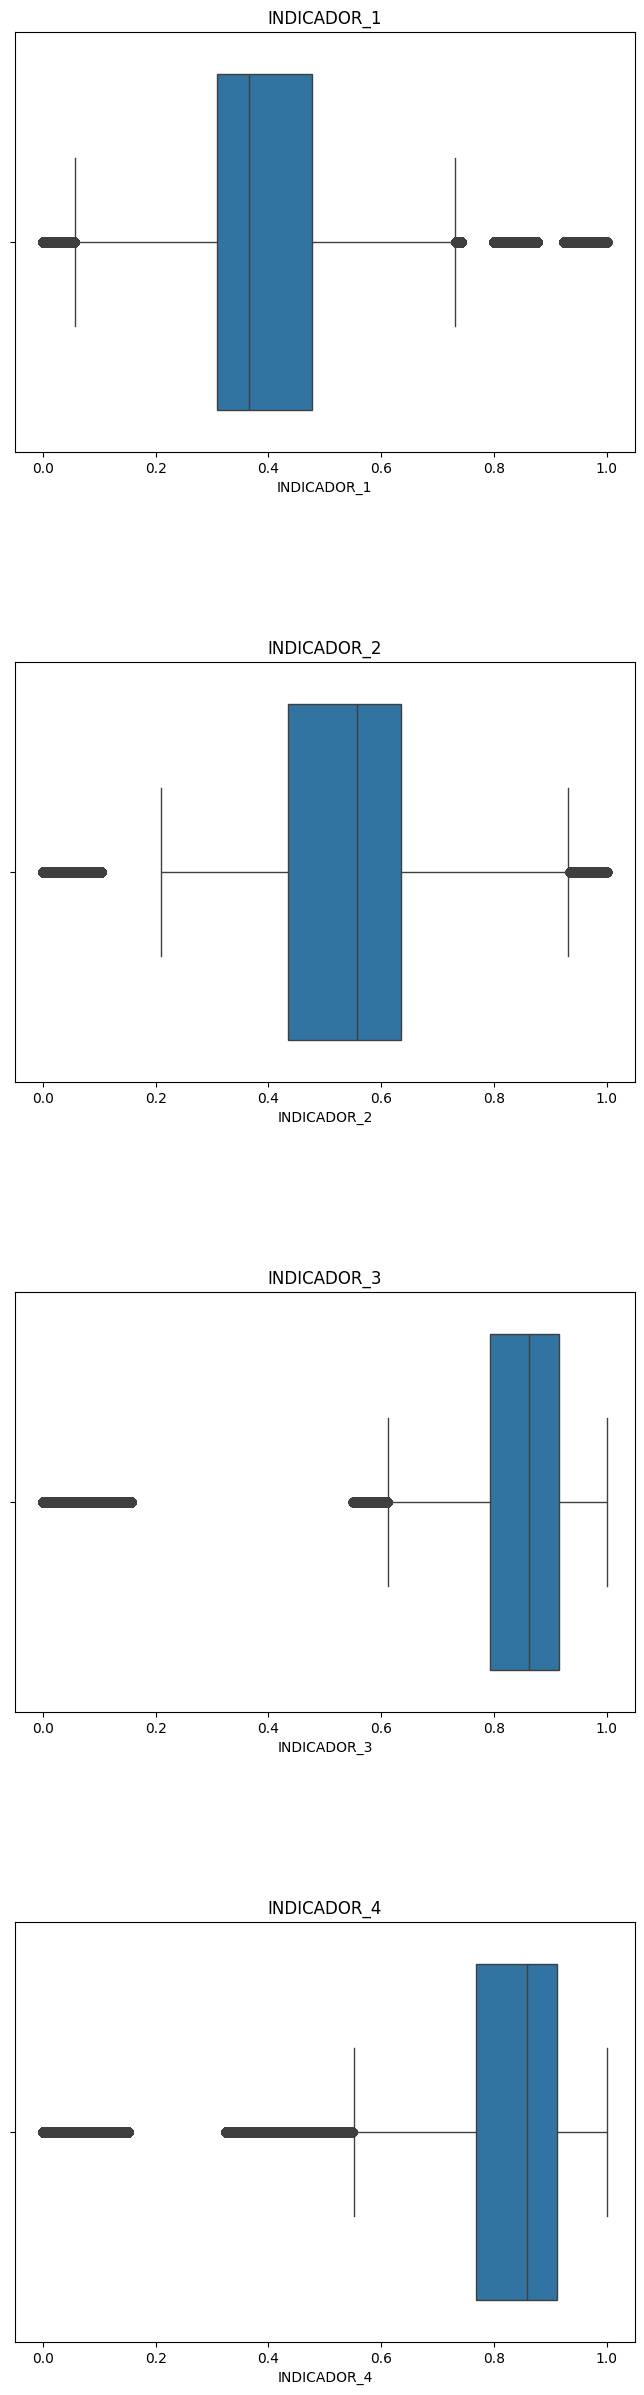

In [ ]:
col_num = ["INDICADOR_1", "INDICADOR_2", "INDICADOR_3", "INDICADOR_4"]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)